## Examen 3 Estadistica III

**Definicion de librerias**

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as sts
%matplotlib inline
from math import exp,log,sqrt,pi,sin

## Pregunta 1
Sea $X_1,...,X_n \sim U(0, \theta)$. El estimador de Máxima verosimilud de $\theta$ es $\hat{\theta}=\max\{X_1,...,X_n\}$

Genera de forma aleatoria una muestra de tamaño 50 con $\theta = 1$

(a) Encuentra la distribución de $\hat{\theta}$ de forma teorica y compara con la obtenida usando remuestreos

(b) Prueba que $\mathbb{P}(\hat{θ}^{∗} =\hat{θ})\approx .632$. Hint: Demuestra que , $\mathbb{P}(\hat{θ}^{∗}_n =\max\{X_1,...,X_n\})=1 − (1 − (\frac{1}{n}))^n$. toma el limite cuando $n$ es grande

In [18]:
X = pd.DataFrame({'x1':np.random.uniform(0,1,50)})

In [19]:
n=len(X['x1'])

In [20]:
Y =np.array(X['x1']) 


**a) Encuentra la distribución de 𝜃̂ de forma teorica**

$F_{ \widehat{\Theta}}\left ( x \right )=P\left ( max\left ( X_{1},  X_{2},..., X_{n}\right )\leq x \right )=P\left (  X_{1}\leq x,  X_{2}\leq x,..., X_{n}\leq x \right )=\prod_{i=1}^{n}P\left (  X_{i}\leq x\right ) $

Ya que cada $X_{i}\sim U\left ( 0,\Theta \right )$

Tenemos que $\prod_{i=1}^{n}P\left (  X_{i}\leq x\right )=\prod_{i=1}^{n}\left ( \frac{x}{\Theta } \right )=\left ( \frac{x}{\Theta } \right )^{n}$

Derivando la ecuacion anterior tenemos $\left ( \frac{n}{\Theta } \right )\left ( \frac{x}{\Theta } \right )^{n-1}$

In [21]:
Theta=1

In [22]:
den= lambda x: (n/Theta)*((x/Theta)**(n-1))

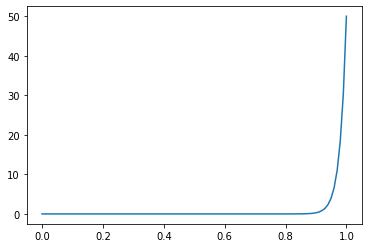

In [23]:
plt.plot(np.linspace(0,1,100),den(np.linspace(0,1,100)))

**a) compara con la obtenida usando remuestreos**

**1.Definicion de los estadisticos**

In [24]:
T= lambda x: max(x)

In [25]:
Maximo_real=T(X['x1'])

In [26]:
display(pd.DataFrame([Maximo_real],index=['Maximo']))

,0
Maximo,0.996785


**2.Remuestreo**

In [27]:
B=4000
T1_List=[0]
for i in range(B):
    Z=T(np.random.choice(X['x1'],n)) 
    T1_List.append(Z)

Text(0.5, 1.0, 'Remuestreo')

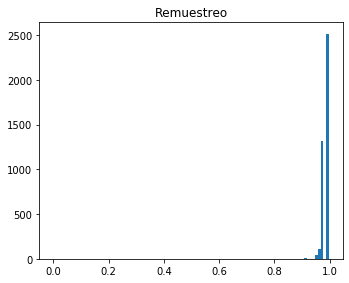

In [28]:
plt.figure(figsize=[25,20])
plt.subplot(4,4,1)
plt.hist(T1_List,bins=100)
plt.title('Remuestreo')


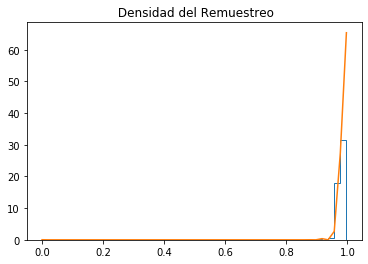

In [29]:
density = sts.gaussian_kde(T1_List)
n, x, _ = plt.hist(T1_List, bins=50, 
                   histtype=u'step', density=True)  
plt.plot(x, density(x))
plt.title(' Densidad del Remuestreo')
plt.show()


**(b)** Prueba que $\mathbb{P}(\hat{θ}^{∗} =\hat{θ})\approx .632$. Hint: Demuestra que , $\mathbb{P}(\hat{θ}^{∗}_n =\max\{X_1,...,X_n\})=1 − (1 − (\frac{1}{n}))^n$. toma el limite cuando $n$ es grande

In [30]:
Proba= lambda x: 1-((1-(1/x))**(x))

In [31]:
Proba(99999)

0.6321223982504225

**Analiticamente**

 Aplicando limite a 
 $\mathbb{P}(\hat{θ}^{∗}_n =\max\{X_1,...,X_n\})=1 − (1 − (\frac{1}{n}))^n$  
 tenemos que $\lim_{n\rightarrow \infty }1-\left (  1-\frac{1}{n}\right )^{n}=1-\frac{1}{e} \approx0.6321 $

## Pregunta 2
Calcula el ancho de banda optimo para estimar la densidad de Z usando un kernel normal.

Compara con la distribución real

$f(x) = \frac{1}{2}\phi(x:0,1) + \frac{1}{10}\sum_{j=0}^4\phi(x:\frac{j}{2}-1,\frac{1}{10}) $

Donde $\phi(x:\mu,\sigma^2)$ es la densidad de una normal $\mu,\sigma^2$

In [32]:
Z = []
for k in range(1000):
    X1 = [np.random.normal(0,1)]
    X2 = [np.random.normal(j/2-1,1/10) for j in range(5)]
    Z.append(np.random.choice(a=X1+X2,p=[0.5,1/10,1/10,1/10,1/10,1/10]))

**Distribucion real**

$f(x) = \frac{1}{2}\phi(x:0,1) + \frac{1}{10}\sum_{j=0}^4\phi(x:\frac{j}{2}-1,\frac{1}{10}) $

Donde $\phi(x:\mu,\sigma^2)$ es la densidad de una normal $\mu,\sigma^2$

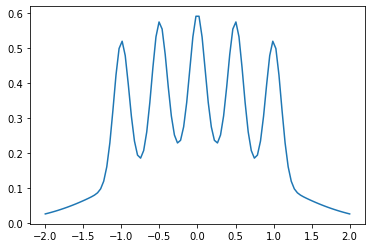

In [33]:
plt.plot(np.linspace(-2,2,100),[((1/2)*(1/sqrt(2*pi)*exp(-x**2/2)))
                                       +((1/10)*((1/sqrt(2*pi*(1/100)))*exp(-((x-((0/2)-1))**2)/(2*(1/100)))
                                               +(1/sqrt(2*pi*(1/100)))*exp(-((x-((1/2)-1))**2)/(2*(1/100)))
                                               +(1/sqrt(2*pi*(1/100)))*exp(-((x-((2/2)-1))**2)/(2*(1/100)))
                                               +(1/sqrt(2*pi*(1/100)))*exp(-((x-((3/2)-1))**2)/(2*(1/100)))
                                               +(1/sqrt(2*pi*(1/100)))*exp(-((x-((4/2)-1))**2)/(2*(1/100)))
                                                 )) for x in np.linspace(-2,2,100)])

**Definicion de funciones**

In [34]:
k= lambda x: 1/sqrt(2*pi)*exp(-x**2/2)
K_star= lambda x: 1/sqrt(2*pi)*exp(-x**2/2*2)-2*k(x)

In [35]:
a,b=min(Z),max(Z)

In [38]:
n=len(Z)

In [40]:
J_1= lambda h:1/(h*n**2)*sum([sum([K_star((Z[i]-Z[j])/h) for j in range(n)]) for i in range (n)])+2/(n*h)*k(0)

In [57]:
J_v = [J_1(h) for h in np.linspace(0.01,1,100)]
h_optimo = np.linspace(0.01,1,100)[np.argmin(J_v )]

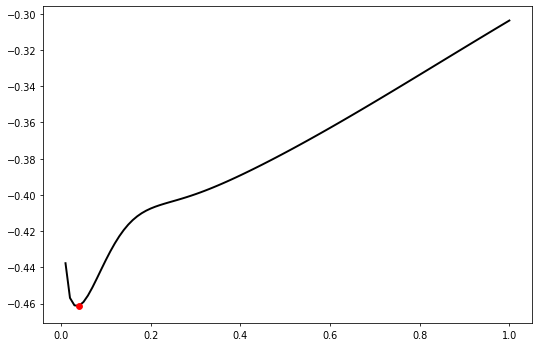

In [74]:
plt.figure(figsize=(9,6),dpi=70)

plt.plot(np.linspace(0.01,1,100),J_v,color='black',lw=2)
plt.scatter([h_optimo],[min(J_v)],color='red',zorder=3)

In [60]:
h_optimo

0.04

**Estimar la densidad de Z usando un kernel normal**

Text(0.5, 1.0, 'Histograma de desidad de la edad con h_optimo = 0.04')

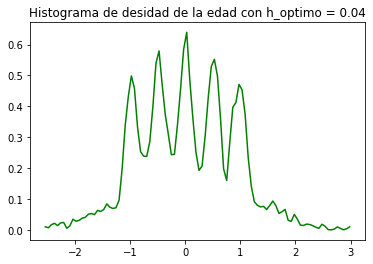

In [75]:
fn= lambda x:(1/n)*sum([(1/h_optimo)*k((x-Z[i])/h_optimo) for i in range(n)])
plt.plot(np.linspace(a,b,100),[fn(x) for x in np.linspace(a,b,100)],color='g')
plt.title('Histograma de desidad de la edad con h_optimo = %s'%Optimo)

## Pregunta 3

Crea una función que reciba pares de datos y calcule la mejor estimación de un suavizamiento por Kernel Nadaraya-Watson de forma automatica y calcule su varianza. 

Para el conjunto de datos el csv DEIII.csv realiza las siguientes regresiones usando tu función que creaste

- $Y_i = r_1(X_i) + \varepsilon_{1i}$
- $W_i = r_2(X_i) + \varepsilon_{2i}$
- $Z_i = r_3(X_i) + \varepsilon_{3i}$
- $Y_i = r_4(W_i) + \varepsilon_{4i}$
- $Y_i = r_5(Z_i) + \varepsilon_{5i}$
- $W_i = r_6(Z_i) + \varepsilon_{6i}$

Agrega graficas de las regresiones y su varianza. Deja manera explicita el valor de $h$ que hayas calculado

Compara $\hat{r}_2$ con $\hat{r}_1\circ\hat{r}_4$

**Importacion de datos**

In [6]:
ruta = 'C:/Users/1063949520/Marcos/Tareas_Estadistica/'
nombre='DEIII.csv'
df = pd.read_csv(ruta+nombre,encoding="iso-8859-1").reset_index(drop=True)

In [8]:
df.shape

(569, 4)

In [45]:
df.describe()

,X,Y,W,Z
count,569.000000,569.000000,569.000000,569.000000
mean,14.127292,40.337079,16.269190,19.289649
std,3.524049,45.491006,4.833242,4.301036
min,6.981000,6.802000,7.930000,9.710000
25%,11.700000,17.850000,13.010000,16.170000
50%,13.370000,24.530000,14.970000,18.840000
75%,15.780000,45.190000,18.790000,21.800000
max,28.110000,542.200000,36.040000,39.280000


In [9]:
##Valores Missing
Missings=df.isnull().sum()
Missings/df.shape[0]*100

X    0.0
Y    0.0
W    0.0
Z    0.0
dtype: float64

In [10]:
X_corr = df.copy()

In [11]:
X_corr.corr()

,X,Y,W,Z
X,1.000000,0.735864,0.969539,0.323782
Y,0.735864,1.000000,0.757373,0.259845
W,0.969539,0.757373,1.000000,0.352573
Z,0.323782,0.259845,0.352573,1.000000


**Definicion de Funciones**

In [81]:
K = lambda x: 1/sqrt(2*pi)*exp(-x**2/2)

In [249]:
def Kernel_NadaraMa_Watson(Y,X):
    n=len(Y)
    def R(h):
        l = lambda x: np.array([K((x-X[i])/h) for i in range(n)])
        r = lambda x: sum((l(x)/sum(l(x)))*Y)
        return((1/n)*sum([((Y[i] - r(X[i])) /(1-l(X[i])[i]/sum(l(X[i]))))**2 for i in range(n)]))
    R_v = [R(h) for h in np.linspace(0.09,20,2)]
    h_op = np.linspace(0.09,20,2)[np.argmin(R_v)]
    h=h_op
    l = lambda x: np.array([K((x-X[i])/h) for i in range(n)])
    r = lambda x: sum((l(x)/sum(l(x)))*Y)
    L = np.array([l(X[i])/sum(l(X[i])) for i in range(n)])
    nu = np.trace(L)
    plt.figure(figsize=(10,6),dpi=100)
    plt.subplot(2,2,1)
    plt.title(f'Kernel Nadaraya-Watson h optimo={h} , $\\nu={nu:.2f}$')
    plt.scatter(X,Y,label='Observaciones',color='black',s=1)
    plt.plot(np.linspace(min(X),max(X),30),[r(x) for x in np.linspace(min(X),max(X),30)],lw=2,color='red',label='$r(x)$')
    plt.xlabel('$x$')
    plt.ylabel('$Y$')
    plt.legend(loc=0)
    Z = np.array([log((Y[i]-r(X[i]))**2) for i in range(n)])
    l = lambda x: np.array([K((x-X[i])/h) for i in range(n)])
    r = lambda x: sum((l(x)/sum(l(x)))*Z)
    L = np.array([l(X[i])/sum(l(X[i])) for i in range(n)])
    nu = np.trace(L)
    plt.figure(figsize=(10,6),dpi=100)
    plt.subplot(2,2,2)
    plt.title(f'Estimación de la varianza')
    plt.plot(np.linspace(min(X),max(X),100),[exp(r(x)) for x in np.linspace(min(X),max(X),100)],lw=2,color='red',label='$\sigma(x)$')
    plt.xlabel('$x$')
    plt.ylabel('$\sigma$')
    plt.legend(loc=2)

**1- $Y_i = r_1(X_i) + \varepsilon_{1i}$**

In [250]:
X = list(df.X)
Y = list(df.Y)

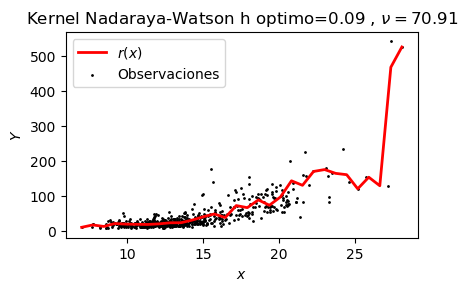

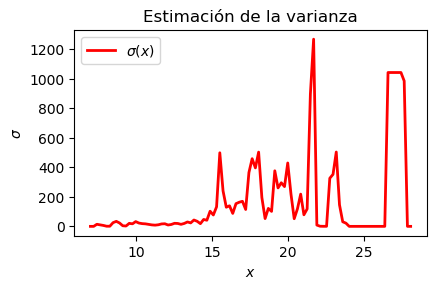

In [251]:
Kernel_NadaraMa_Watson(Y,X)

In [182]:
def Kernel_NadaraMa_Watson(Y,X):
    n=len(Y)
    def R(h):
        l = lambda x: np.array([K((x-X[i])/h) for i in range(n)])
        r = lambda x: sum((l(x)/sum(l(x)))*Y)
        return((1/n)*sum([((Y[i] - r(X[i])) /(1-l(X[i])[i]/sum(l(X[i]))))**2 for i in range(n)]))
    R_v = [R(h) for h in np.linspace(1,20,2)]
    h_op = np.linspace(1,20,2)[np.argmin(R_v)]
    h=h_op
    l = lambda x: np.array([K((x-X[i])/h) for i in range(n)])
    r = lambda x: sum((l(x)/sum(l(x)))*Y)
    L = np.array([l(X[i])/sum(l(X[i])) for i in range(n)])
    nu = np.trace(L)
    plt.figure(figsize=(10,6),dpi=100)
    plt.subplot(2,2,1)
    plt.title(f'Kernel Nadaraya-Watson h optimo={h} , $\\nu={nu:.2f}$')
    plt.scatter(X,Y,label='Observaciones',color='black',s=1)
    plt.plot(np.linspace(min(X),max(X),30),[r(x) for x in np.linspace(min(X),max(X),30)],lw=2,color='red',label='$r(x)$')
    plt.xlabel('$x$')
    plt.ylabel('$Y$')
    plt.legend(loc=0)
    Z = np.array([log((Y[i]-r(X[i]))**2) for i in range(n)])
    l = lambda x: np.array([K((x-X[i])/h) for i in range(n)])
    r = lambda x: sum((l(x)/sum(l(x)))*Z)
    L = np.array([l(X[i])/sum(l(X[i])) for i in range(n)])
    nu = np.trace(L)
    plt.figure(figsize=(10,6),dpi=100)
    plt.subplot(2,2,2)
    plt.title(f'Estimación de la varianza')
    plt.plot(np.linspace(min(X),max(X),100),[exp(r(x)) for x in np.linspace(min(X),max(X),100)],lw=2,color='red',label='$\sigma(x)$')
    plt.xlabel('$x$')
    plt.ylabel('$\sigma$')
    plt.legend(loc=2)

**2- $W_i = r_2(X_i) + \varepsilon_{2i}$**

In [183]:
X = list(df.X)
W = list(df.W)

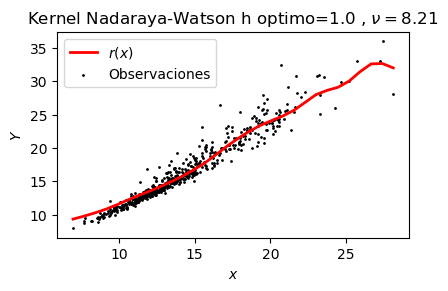

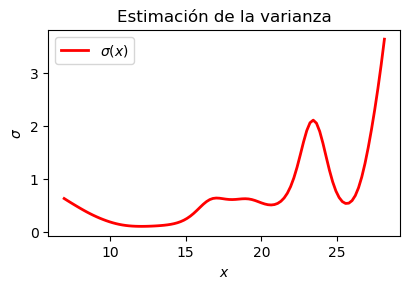

In [184]:
Kernel_NadaraMa_Watson(W,X)

In [194]:
def Kernel_NadaraMa_Watson(Y,X):
    n=len(Y)
    def R(h):
        l = lambda x: np.array([K((x-X[i])/h) for i in range(n)])
        r = lambda x: sum((l(x)/sum(l(x)))*Y)
        return((1/n)*sum([((Y[i] - r(X[i])) /(1-l(X[i])[i]/sum(l(X[i]))))**2 for i in range(n)]))
    R_v = [R(h) for h in np.linspace(0.1,20,2)]
    h_op = np.linspace(0.1,20,2)[np.argmin(R_v)]
    h=h_op
    l = lambda x: np.array([K((x-X[i])/h) for i in range(n)])
    r = lambda x: sum((l(x)/sum(l(x)))*Y)
    L = np.array([l(X[i])/sum(l(X[i])) for i in range(n)])
    nu = np.trace(L)
    plt.figure(figsize=(10,6),dpi=100)
    plt.subplot(2,2,1)
    plt.title(f'Kernel Nadaraya-Watson h optimo={h} , $\\nu={nu:.2f}$')
    plt.scatter(X,Y,label='Observaciones',color='black',s=1)
    plt.plot(np.linspace(min(X),max(X),30),[r(x) for x in np.linspace(min(X),max(X),30)],lw=2,color='red',label='$r(x)$')
    plt.xlabel('$x$')
    plt.ylabel('$Y$')
    plt.legend(loc=0)
    Z = np.array([log((Y[i]-r(X[i]))**2) for i in range(n)])
    l = lambda x: np.array([K((x-X[i])/h) for i in range(n)])
    r = lambda x: sum((l(x)/sum(l(x)))*Z)
    L = np.array([l(X[i])/sum(l(X[i])) for i in range(n)])
    nu = np.trace(L)
    plt.figure(figsize=(10,6),dpi=100)
    plt.subplot(2,2,2)
    plt.title(f'Estimación de la varianza')
    plt.plot(np.linspace(min(X),max(X),100),[exp(r(x)) for x in np.linspace(min(X),max(X),100)],lw=2,color='red',label='$\sigma(x)$')
    plt.xlabel('$x$')
    plt.ylabel('$\sigma$')
    plt.legend(loc=2)

**3- $Z_i = r_3(X_i) + \varepsilon_{3i}$**

In [195]:
X = list(df.X)
Z = list(df.Z)

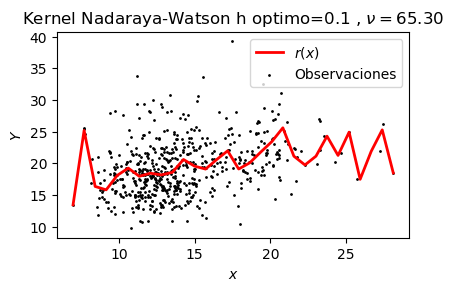

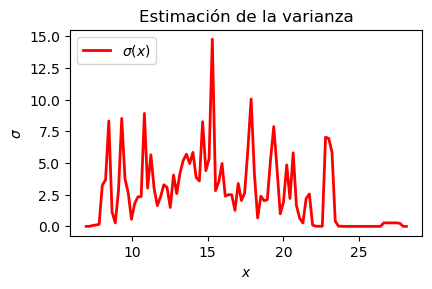

In [196]:
Kernel_NadaraMa_Watson(Z,X)

In [197]:
def Kernel_NadaraMa_Watson(Y,X):
    n=len(Y)
    def R(h):
        l = lambda x: np.array([K((x-X[i])/h) for i in range(n)])
        r = lambda x: sum((l(x)/sum(l(x)))*Y)
        return((1/n)*sum([((Y[i] - r(X[i])) /(1-l(X[i])[i]/sum(l(X[i]))))**2 for i in range(n)]))
    R_v = [R(h) for h in np.linspace(1,20,2)]
    h_op = np.linspace(1,20,2)[np.argmin(R_v)]
    h=h_op
    l = lambda x: np.array([K((x-X[i])/h) for i in range(n)])
    r = lambda x: sum((l(x)/sum(l(x)))*Y)
    L = np.array([l(X[i])/sum(l(X[i])) for i in range(n)])
    nu = np.trace(L)
    plt.figure(figsize=(10,6),dpi=100)
    plt.subplot(2,2,1)
    plt.title(f'Kernel Nadaraya-Watson h optimo={h} , $\\nu={nu:.2f}$')
    plt.scatter(X,Y,label='Observaciones',color='black',s=1)
    plt.plot(np.linspace(min(X),max(X),30),[r(x) for x in np.linspace(min(X),max(X),30)],lw=2,color='red',label='$r(x)$')
    plt.xlabel('$x$')
    plt.ylabel('$Y$')
    plt.legend(loc=0)
    Z = np.array([log((Y[i]-r(X[i]))**2) for i in range(n)])
    l = lambda x: np.array([K((x-X[i])/h) for i in range(n)])
    r = lambda x: sum((l(x)/sum(l(x)))*Z)
    L = np.array([l(X[i])/sum(l(X[i])) for i in range(n)])
    nu = np.trace(L)
    plt.figure(figsize=(10,6),dpi=100)
    plt.subplot(2,2,2)
    plt.title(f'Estimación de la varianza')
    plt.plot(np.linspace(min(X),max(X),100),[exp(r(x)) for x in np.linspace(min(X),max(X),100)],lw=2,color='red',label='$\sigma(x)$')
    plt.xlabel('$x$')
    plt.ylabel('$\sigma$')
    plt.legend(loc=2)

**4- $W_i = r_6(Z_i) + \varepsilon_{6i}$**

In [198]:
Z = list(df.Z)
W = list(df.W)

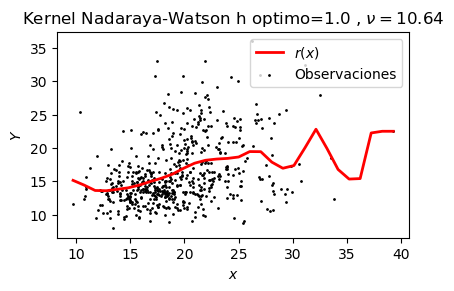

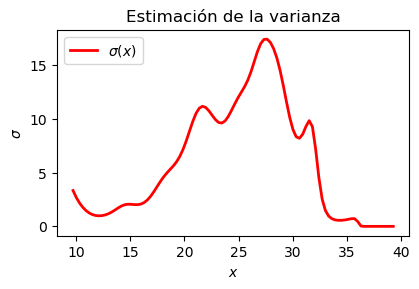

In [199]:
Kernel_NadaraMa_Watson(W,Z)

In [218]:
def Kernel_NadaraMa_Watson(Y,X):
    n=len(Y)
    def R(h):
        l = lambda x: np.array([K((x-X[i])/h) for i in range(n)])
        r = lambda x: sum((l(x)/sum(l(x)))*Y)
        return((1/n)*sum([((Y[i] - r(X[i])) /(1-l(X[i])[i]/sum(l(X[i]))))**2 for i in range(n)]))
    R_v = [R(h) for h in np.linspace(0.65,20,2)]
    h_op = np.linspace(0.65,20,2)[np.argmin(R_v)]
    h=h_op
    l = lambda x: np.array([K((x-X[i])/h) for i in range(n)])
    r = lambda x: sum((l(x)/sum(l(x)))*Y)
    L = np.array([l(X[i])/sum(l(X[i])) for i in range(n)])
    nu = np.trace(L)
    plt.figure(figsize=(10,6),dpi=100)
    plt.subplot(2,2,1)
    plt.title(f'Kernel Nadaraya-Watson h optimo={h} , $\\nu={nu:.2f}$')
    plt.scatter(X,Y,label='Observaciones',color='black',s=1)
    plt.plot(np.linspace(min(X),max(X),30),[r(x) for x in np.linspace(min(X),max(X),30)],lw=2,color='red',label='$r(x)$')
    plt.xlabel('$x$')
    plt.ylabel('$Y$')
    plt.legend(loc=0)
    Z = np.array([log((Y[i]-r(X[i]))**2) for i in range(n)])
    l = lambda x: np.array([K((x-X[i])/h) for i in range(n)])
    r = lambda x: sum((l(x)/sum(l(x)))*Z)
    L = np.array([l(X[i])/sum(l(X[i])) for i in range(n)])
    nu = np.trace(L)
    plt.figure(figsize=(10,6),dpi=100)
    plt.subplot(2,2,2)
    plt.title(f'Estimación de la varianza')
    plt.plot(np.linspace(min(X),max(X),100),[exp(r(x)) for x in np.linspace(min(X),max(X),100)],lw=2,color='red',label='$\sigma(x)$')
    plt.xlabel('$x$')
    plt.ylabel('$\sigma$')
    plt.legend(loc=2)

**5- $Y_i = r_5(Z_i) + \varepsilon_{5i}$**

In [219]:
Z = list(df.Z)
Y = list(df.Y)

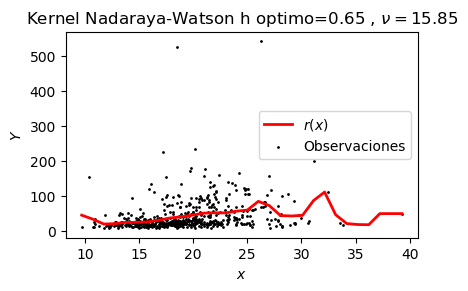

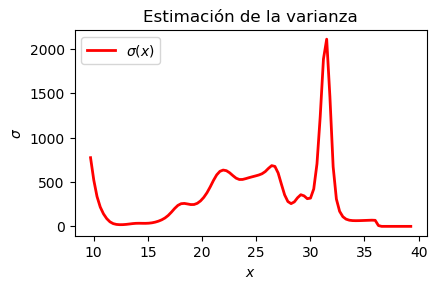

In [220]:
Kernel_NadaraMa_Watson(Y,Z)

In [240]:
def Kernel_NadaraMa_Watson(Y,X):
    n=len(Y)
    def R(h):
        l = lambda x: np.array([K((x-X[i])/h) for i in range(n)])
        r = lambda x: sum((l(x)/sum(l(x)))*Y)
        return((1/n)*sum([((Y[i] - r(X[i])) /(1-l(X[i])[i]/sum(l(X[i]))))**2 for i in range(n)]))
    R_v = [R(h) for h in np.linspace(0.64,20,2)]
    h_op = np.linspace(0.64,20,2)[np.argmin(R_v)]
    h=h_op
    l = lambda x: np.array([K((x-X[i])/h) for i in range(n)])
    r = lambda x: sum((l(x)/sum(l(x)))*Y)
    L = np.array([l(X[i])/sum(l(X[i])) for i in range(n)])
    nu = np.trace(L)
    plt.figure(figsize=(10,6),dpi=100)
    plt.subplot(2,2,1)
    plt.title(f'Kernel Nadaraya-Watson h optimo={h} , $\\nu={nu:.2f}$')
    plt.scatter(X,Y,label='Observaciones',color='black',s=1)
    plt.plot(np.linspace(min(X),max(X),30),[r(x) for x in np.linspace(min(X),max(X),30)],lw=2,color='red',label='$r(x)$')
    plt.xlabel('$x$')
    plt.ylabel('$Y$')
    plt.legend(loc=0)
    Z = np.array([log((Y[i]-r(X[i]))**2) for i in range(n)])
    l = lambda x: np.array([K((x-X[i])/h) for i in range(n)])
    r = lambda x: sum((l(x)/sum(l(x)))*Z)
    L = np.array([l(X[i])/sum(l(X[i])) for i in range(n)])
    nu = np.trace(L)
    plt.figure(figsize=(10,6),dpi=100)
    plt.subplot(2,2,2)
    plt.title(f'Estimación de la varianza')
    plt.plot(np.linspace(min(X),max(X),100),[exp(r(x)) for x in np.linspace(min(X),max(X),100)],lw=2,color='red',label='$\sigma(x)$')
    plt.xlabel('$x$')
    plt.ylabel('$\sigma$')
    plt.legend(loc=2)

**6- $W_i = r_6(Z_i) + \varepsilon_{6i}$**

In [241]:
Z = list(df.Z)
W = list(df.W)

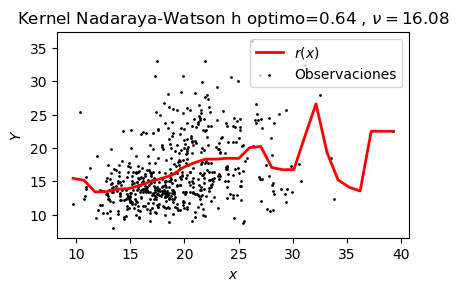

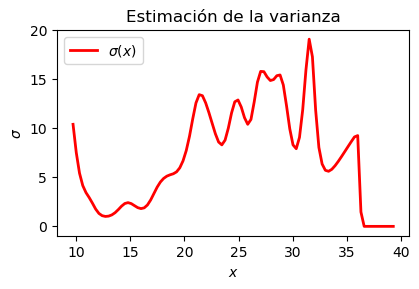

In [242]:
Kernel_NadaraMa_Watson(W,Z)